In [1]:
import os

path, dirs, files = next(os.walk('train'))

print("There is")
print(len(files))
print("files")

There is
25000
files


In [2]:
file_names = os.listdir('train')[:2000]
print(file_names[9])

dog.5535.jpg


In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

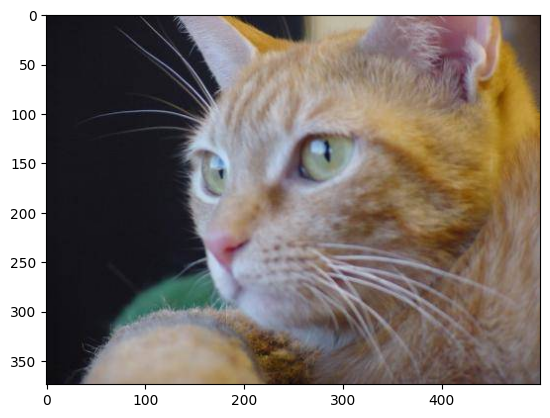

In [4]:
cat = mping.imread('train/cat.1044.jpg')
plt.imshow(cat)
plt.show()

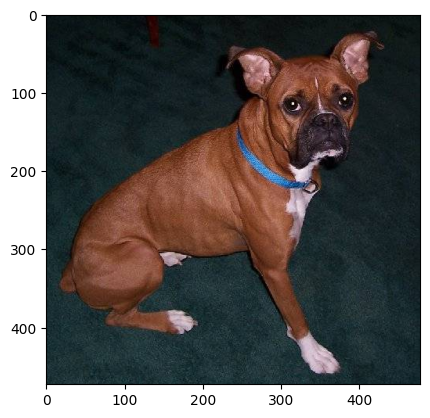

In [40]:
dog = mping.imread('train/dog.10287.jpg')
plt.imshow(dog)
plt.show()

In [6]:
cat_files = []
dog_files = []

labels = []

for file_name in file_names:
    if file_name.startswith('cat'):
        cat_files.append(file_name)
        
        labels.append(0)
    elif file_name.startswith('dog'):
        dog_files.append(file_name)

        labels.append(1)

print(len(cat_files))
print(len(dog_files))

986
1014


In [7]:
import PIL

for file_name in file_names:
    img = PIL.Image.open('train/' + file_name)
    img = img.resize((224,224))
    img = img.convert('RGB')

    img.save('resized/' + file_name)

In [8]:
import cv2
import glob
import numpy as np

dog_cat_images = []

files = []
for file_name in file_names:
    dog_cat_images.append(cv2.imread('resized/' + file_name))


dog_cat_images = np.asarray(dog_cat_images)

In [9]:
from sklearn.model_selection import train_test_split

labels = np.asarray(labels)

X_train, X_test, Y_train, Y_test, = train_test_split(dog_cat_images, labels, test_size=0.2, random_state=2)

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [11]:
import tensorflow as tf
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)


In [12]:
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])

model.summary

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

model.fit(X_train_scaled, Y_train, epochs=5)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Epoch 1/5


2023-02-14 09:35:08.267777: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


50/50 [==============================] - 10s 148ms/step - loss: 0.2044 - acc: 0.9187
Epoch 2/5
50/50 [==============================] - 7s 146ms/step - loss: 0.0711 - acc: 0.9775
Epoch 3/5
50/50 [==============================] - 7s 141ms/step - loss: 0.0513 - acc: 0.9862
Epoch 4/5
50/50 [==============================] - 7s 141ms/step - loss: 0.0393 - acc: 0.9900
Epoch 5/5
50/50 [==============================] - 7s 141ms/step - loss: 0.0341 - acc: 0.9925


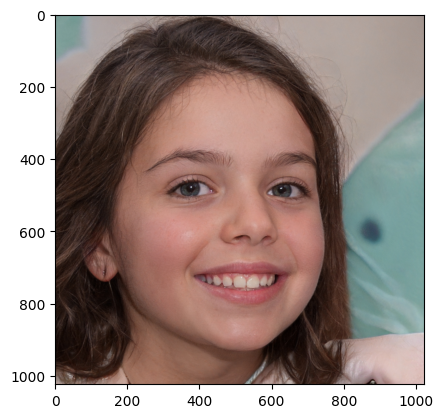

In [81]:
image_number = input("Choose a file thats within 1 - 12500: ")
test_image = mping.imread(f'test1/{image_number}.jpg')
plt.imshow(test_image)
plt.show()

In [82]:
input_image = cv2.imread(f'test1/{image_number}.jpg')

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

1/1 [==============================] - 0s 26ms/step
[[ 0.29251027 -2.0330827 ]]


In [83]:
cat_or_dog = np.argmax(input_prediction)

print(cat_or_dog)

if cat_or_dog == 0:
    print("cat")
elif cat_or_dog == 1:
    print("dog")

0
cat
